In [1]:
%matplotlib inline

In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [4]:
## upload file

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))

Saving rgbmap.png to rgbmap.png


In [5]:
# converting file to Image object
img = Image.open(filename)

#Image.open(filename)

In [6]:
(left, upper, right, lower) = (20, 20, 100, 100)
crop_test = img.crop((left, upper, right, lower))



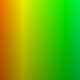

In [ ]:
crop_test

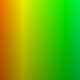

In [ ]:
display(crop_test)

In [23]:
detail = int(input("select detail quality"))

select detail quality10


In [24]:
# putting all cropped images in list

listtest = []

#each image size is detailxdetail
for i in range(0, img.width-detail, detail):
  for j in range(0, img.height-detail, detail):
    listtest.append(img.crop((j, i, j+detail, i+detail)))
    crop = img.crop((j, i, j+detail, i+detail))
    ## display(crop)


In [44]:
## TESTING
def get_dominant_color(pil_img):
    img = pil_img.copy()
    img = img.convert("RGBA")
    img = img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((0, 0))
    return dominant_color

In [77]:
print(get_dominant_color(listtest[0]))
display(listtest[0])
#print(pix(listtest[0][0,10]))

255


In [8]:
# rgb values array test

for i in range(len(listtest)):
  #np.average(crop, axis=(0,1))
  hi = np.average((listtest[i]), axis=(0,1))
  print(hi)


[243.      68.4272   0.    ]
[237.5184 206.1328   0.    ]
[131.5568 243.       0.    ]
[ 12.4336 243.      23.8208]
[  0.     243.     154.4672]
[  0.     187.88   242.0352]
[  2.2016  47.8432 243.    ]
[ 97.0704   0.     243.    ]
[223.832    0.     226.7184]
[243.       0.     102.8752]
[218.      61.3248   0.    ]
[213.0624 184.8976   0.    ]
[117.9488 218.       0.    ]
[ 11.136  218.      21.3584]
[  0.     218.     138.5344]
[  0.     168.4848 217.1248]
[  1.9808  42.8752 218.    ]
[ 87.0432   0.     218.    ]
[200.7872   0.     203.3552]
[218.      0.     92.216]
[193.     54.224   0.   ]
[188.6048 163.6448   0.    ]
[104.36 193.     0.  ]
[  9.8288 193.      18.864 ]
[  0.    193.    122.584]
[  0.     149.1008 192.208 ]
[  1.7424  37.896  193.    ]
[ 76.9872   0.     193.    ]
[177.7152   0.     180.    ]
[193.       0.      81.5728]
[168.      47.1408   0.    ]
[164.1488 142.3904   0.    ]
[ 90.7728 168.       0.    ]
[  8.536  168.      16.3856]
[  0.     168.     106.6448]


In [25]:
def find_Avg_Color(cropped_average, original_array):
  r = cropped_average[0]
  g = cropped_average[1]
  b = cropped_average[2]

  current_lowest = 1000
  lowest_index = 0;
  for i in range(len(original_array)):
    total_difference = 0;
    curr_avg = np.average(original_array[i], axis=(0,1))
    #print(curr_avg)

    total_difference += abs(r - curr_avg[0])
    total_difference += abs(g - curr_avg[1])
    total_difference += abs(b - curr_avg[2])

    if (total_difference < current_lowest):
      current_lowest = total_difference
      lowest_index = i

  return lowest_index


In [80]:
def find_Dominant_Color(cropped_img, original_array):

  img = cropped_img.copy()
  img = img.convert("RGBA")
  img = img.resize((1, 1), resample=0)
  dominant_color = img.getpixel((0, 0))

  # print(dominant_color[3])


  current_lowest = 1000
  lowest_index = 0;

  for i in range(len(original_array)):
    total_difference = 0;

    original_img = original_array[i].convert("RGBA")
    original_img = original_img.convert("RGBA")
    original_img = original_img.resize((1, 1), resample=0)
    original_dominant_color = original_img.getpixel((0,0))

    r = original_dominant_color[0]
    g = original_dominant_color[1]
    b = original_dominant_color[2]
    a = original_dominant_color[3]

    total_difference += abs(r - dominant_color[0])
    total_difference += abs(g - dominant_color[1])
    total_difference += abs(b - dominant_color[2])
    total_difference += abs(a - dominant_color[3])

    if (total_difference < current_lowest):
      current_lowest = total_difference
      lowest_index = i

  return lowest_index

In [26]:
#list contents

for i in range(len(listtest)):
  display(listtest[i])

In [89]:
test_img_file = files.upload()

test_img_filename = next(iter(test_img_file))
library_img = Image.open(test_img_filename)

Saving red-apple-isolated-on-white-600nw-1727544364.webp to red-apple-isolated-on-white-600nw-1727544364.webp


In [90]:
## USING DOMINANT COLOR CODE


copy = library_img.copy()
library_arr = []

copy1 = library_img.copy().convert('RGBA')
png = np.array(copy1)

counter = 0
for i in range(0, library_img.height, detail):
  for j in range(0, library_img.width, detail):
    library_arr.append(library_img.crop((j, i, j+detail, i+detail)))
    crop = library_img.crop((j, i, j+detail, i+detail))




    new_img = listtest[find_Dominant_Color(crop, listtest)]
    # Image.putdata(data, scale=1.0, offset=0.0)
    # left, upper, right, and lower
    Image.Image.paste(copy, new_img, (j, i, j+detail, i+detail))

    counter+=1
    print("progress: " + str(counter) + "/" + str((((library_img.width)/detail) * ((library_img.height)/detail))))
    ## searching the original picture for a similar color

progress: 1/3444.0
progress: 2/3444.0
progress: 3/3444.0
progress: 4/3444.0
progress: 5/3444.0
progress: 6/3444.0
progress: 7/3444.0
progress: 8/3444.0
progress: 9/3444.0
progress: 10/3444.0
progress: 11/3444.0
progress: 12/3444.0
progress: 13/3444.0
progress: 14/3444.0
progress: 15/3444.0
progress: 16/3444.0
progress: 17/3444.0
progress: 18/3444.0
progress: 19/3444.0
progress: 20/3444.0
progress: 21/3444.0
progress: 22/3444.0
progress: 23/3444.0
progress: 24/3444.0
progress: 25/3444.0
progress: 26/3444.0
progress: 27/3444.0
progress: 28/3444.0
progress: 29/3444.0
progress: 30/3444.0
progress: 31/3444.0
progress: 32/3444.0
progress: 33/3444.0
progress: 34/3444.0
progress: 35/3444.0
progress: 36/3444.0
progress: 37/3444.0
progress: 38/3444.0
progress: 39/3444.0
progress: 40/3444.0
progress: 41/3444.0
progress: 42/3444.0
progress: 43/3444.0
progress: 44/3444.0
progress: 45/3444.0
progress: 46/3444.0
progress: 47/3444.0
progress: 48/3444.0
progress: 49/3444.0
progress: 50/3444.0
progress:

In [92]:
## USING AVERAGE COLOR CODE

copy = library_img.copy()
library_arr = []

copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)

counter = 0
for i in range(0, library_img.height, detail):
  for j in range(0, library_img.width, detail):
    library_arr.append(library_img.crop((j, i, j+detail, i+detail)))
    crop = library_img.crop((j, i, j+detail, i+detail))
    curr_avg = np.average(crop, axis=(0,1))



    new_img = listtest[find_Avg_Color(curr_avg, listtest)]
    # Image.putdata(data, scale=1.0, offset=0.0)
    # left, upper, right, and lower
    Image.Image.paste(copy, new_img, (j, i, j+detail, i+detail))

    counter+=1
    print("progress: " + str(counter) + "/" + str((((library_img.width)/detail) * ((library_img.height)/detail))))
    ## searching the original picture for a similar color

progress: 1/3444.0
progress: 2/3444.0
progress: 3/3444.0
progress: 4/3444.0
progress: 5/3444.0
progress: 6/3444.0
progress: 7/3444.0
progress: 8/3444.0
progress: 9/3444.0
progress: 10/3444.0
progress: 11/3444.0
progress: 12/3444.0
progress: 13/3444.0
progress: 14/3444.0
progress: 15/3444.0
progress: 16/3444.0
progress: 17/3444.0
progress: 18/3444.0
progress: 19/3444.0
progress: 20/3444.0
progress: 21/3444.0
progress: 22/3444.0
progress: 23/3444.0
progress: 24/3444.0
progress: 25/3444.0
progress: 26/3444.0
progress: 27/3444.0
progress: 28/3444.0
progress: 29/3444.0
progress: 30/3444.0
progress: 31/3444.0
progress: 32/3444.0
progress: 33/3444.0
progress: 34/3444.0
progress: 35/3444.0
progress: 36/3444.0
progress: 37/3444.0
progress: 38/3444.0
progress: 39/3444.0
progress: 40/3444.0
progress: 41/3444.0
progress: 42/3444.0
progress: 43/3444.0
progress: 44/3444.0
progress: 45/3444.0
progress: 46/3444.0
progress: 47/3444.0
progress: 48/3444.0
progress: 49/3444.0
progress: 50/3444.0
progress:

In [39]:
copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)
print(png)

[[[133 129 164]
  [133 129 164]
  [133 129 164]
  ...
  [187 206 221]
  [187 206 221]
  [189 207 222]]

 [[133 129 164]
  [133 129 164]
  [133 129 164]
  ...
  [187 206 221]
  [188 207 222]
  [190 207 223]]

 [[133 129 164]
  [133 129 164]
  [133 129 164]
  ...
  [188 207 222]
  [189 208 223]
  [190 207 223]]

 ...

 [[ 97  74  92]
  [ 80  68  83]
  [ 67  65  79]
  ...
  [ 36  66  98]
  [ 39  70 102]
  [ 41  71 105]]

 [[123  83 101]
  [ 95  68  84]
  [ 92  80  91]
  ...
  [ 35  65  97]
  [ 38  68 101]
  [ 40  70 104]]

 [[105  68  86]
  [ 82  57  72]
  [ 93  77  88]
  ...
  [ 34  64  96]
  [ 37  67 100]
  [ 47  77 111]]]


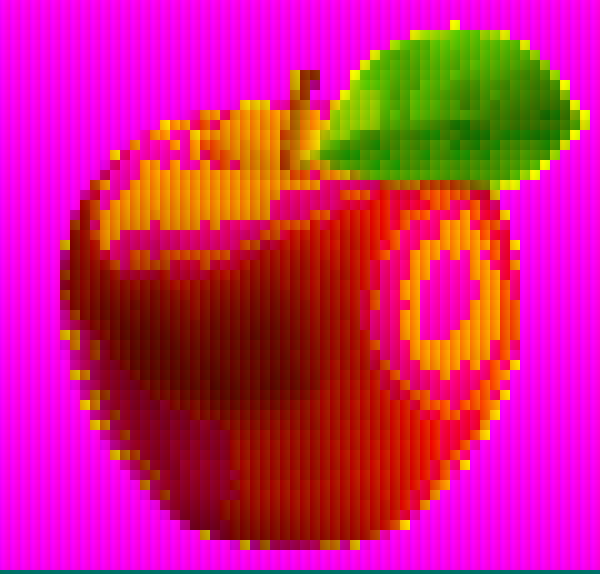

In [93]:
display(copy)